In [1]:
import pandas as pd

In [2]:
resale_df=pd.read_csv("D:\BAP DATASET\HDB Resale\HDB RESALE DATA\Resale_Flat_Processed_Data(2021)-Final.csv")

C:\Users\65983\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
resale_df.dtypes

Unnamed: 0                        int64
month                             int64
town                             object
flat_type                        object
block                            object
street_name                      object
storey_range                     object
floor_area_sqm                  float64
flat_model                       object
lease_commence_date               int64
resale_price                    float64
full_address                     object
SEARCHVAL                        object
BUILDING                         object
ADDRESS                          object
POSTAL                           object
X                               float64
Y                               float64
LATITUDE                        float64
LONGITUDE                       float64
lat_long                         object
distance_to_nearest_station     float64
distance_to_nearest_sch         float64
shopping_mall                    object
distance_to_nearest_mall        float64


In [4]:
temp_df=resale_df.drop(["Unnamed: 0","shopping_mall","lease_commence_date","num_mall_2km","num_hawker_2km","num_park_2km","full_address","SEARCHVAL","X","Y","hawker","shopping_mall","street_name","POSTAL","BUILDING","block","year_month","month","ADDRESS","lat_long"],axis=1)

In [5]:
temp_df

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,LATITUDE,LONGITUDE,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,year,flat_type_int,remaining_lease_time
0,BUKIT MERAH,3 ROOM,10 TO 12,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45
1,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45
2,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45000.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45
3,BUKIT MERAH,3 ROOM,13 TO 15,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45
4,BUKIT MERAH,3 ROOM,13 TO 15,70.0,Improved,52800.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46072,PUNGGOL,5 ROOM,07 TO 09,112.0,Improved,599888.0,1.402986,103.895021,0.361388,1.613548,0.888716,4.954331,1.252832,2021,4,4
46073,PUNGGOL,5 ROOM,01 TO 03,113.0,Premium Apartment,580000.0,1.408262,103.898018,0.063734,2.285057,0.511634,5.596821,0.814639,2021,4,4
46074,SENGKANG,4 ROOM,16 TO 18,92.0,Model A,600000.0,1.381554,103.890563,0.317347,1.065755,0.390477,2.533116,1.034172,2021,3,4
46075,SENGKANG,5 ROOM,01 TO 03,113.0,Improved,655000.0,1.381554,103.890563,0.317347,1.065755,0.390477,2.533116,1.034172,2021,4,4


In [6]:
##One hot encoding


In [7]:
import numpy as np
def int_encode_flatmodel(emp):
    if emp=='Improved':
        emp_int=0
    elif emp=='STANDARD':
        emp_int=1
    elif emp=='New Generation':
        emp_int=2
    elif emp=='Model A':
        emp_int=3
    elif emp=='Simplified':
        emp_int=4
    elif emp=='Maisonette':
        emp_int=5
    elif emp=='Apartment':
        emp_int=6
    elif emp=='Standard':
        emp_int=7
    elif emp=='Adjoined flat':
        emp_int=8
    elif emp=='Model A2':
        emp_int=9
    elif emp=='Premium Apartment':
        emp_int=10
    elif emp=='misc':
        emp_int=11
    else:
        emp_int=-1
    return emp_int
        
temp_df["flat_model_int"]=temp_df["flat_model"].apply(int_encode_flatmodel)
temp_df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,LATITUDE,LONGITUDE,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,year,flat_type_int,remaining_lease_time,flat_model_int
0,BUKIT MERAH,3 ROOM,10 TO 12,59.0,Improved,45500.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0
1,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45500.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0
2,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45000.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0
3,BUKIT MERAH,3 ROOM,13 TO 15,59.0,Improved,45500.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0
4,BUKIT MERAH,3 ROOM,13 TO 15,70.0,Improved,52800.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0


In [8]:
import numpy as np
def int_encode_town(emp):
    if emp=='BUKIT MERAH':
        emp_int=0
    elif emp=='CHOA CHU KANG':
        emp_int=1
    elif emp=='GEYLANG':
        emp_int=2
    elif emp=='KALLANG/WHAMPOA':
        emp_int=3
    elif emp=='TOA PAYOH':
        emp_int=4
    elif emp=='WOODLANDS':
        emp_int=5
    elif emp=='CENTRAL AREA':
        emp_int=6
    elif emp=='BEDOK':
        emp_int=7
    elif emp=='SEMBAWANG':
        emp_int=8
    elif emp== 'SENGKANG':
        emp_int=9
    elif emp=='BUKIT PANJANG':
        emp_int=10
    elif emp=='PUNGGOL':
        emp_int=11
    elif emp=='HOUGANG':
        emp_int=12
    elif emp=='TAMPINES':
        emp_int=13
    
    else:
        emp_int=-1
    return emp_int
        
temp_df["town_int"]=temp_df["town"].apply(int_encode_town)
temp_df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,LATITUDE,LONGITUDE,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,year,flat_type_int,remaining_lease_time,flat_model_int,town_int
0,BUKIT MERAH,3 ROOM,10 TO 12,59.0,Improved,45500.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
1,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45500.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
2,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45000.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
3,BUKIT MERAH,3 ROOM,13 TO 15,59.0,Improved,45500.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
4,BUKIT MERAH,3 ROOM,13 TO 15,70.0,Improved,52800.0,1.270919,103.822685,0.56444,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0


### Predicting Resale Price with Multivariate Linear Regression

In [9]:
#Predicting Resale Price 

In [10]:
x_df=temp_df[["town","flat_type","storey_range","floor_area_sqm","flat_model","remaining_lease_time","distance_to_nearest_station","distance_to_nearest_sch","distance_to_nearest_mall","distance_from_nearest_hawker","distance_from_nearest_park","year","flat_type_int","flat_model_int","town_int"]]

In [11]:
x_df

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease_time,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,year,flat_type_int,flat_model_int,town_int
0,BUKIT MERAH,3 ROOM,10 TO 12,59.0,Improved,45,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,0,0
1,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,0,0
2,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,0,0
3,BUKIT MERAH,3 ROOM,13 TO 15,59.0,Improved,45,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,0,0
4,BUKIT MERAH,3 ROOM,13 TO 15,70.0,Improved,45,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46072,PUNGGOL,5 ROOM,07 TO 09,112.0,Improved,4,0.361388,1.613548,0.888716,4.954331,1.252832,2021,4,0,11
46073,PUNGGOL,5 ROOM,01 TO 03,113.0,Premium Apartment,4,0.063734,2.285057,0.511634,5.596821,0.814639,2021,4,10,11
46074,SENGKANG,4 ROOM,16 TO 18,92.0,Model A,4,0.317347,1.065755,0.390477,2.533116,1.034172,2021,3,3,9
46075,SENGKANG,5 ROOM,01 TO 03,113.0,Improved,4,0.317347,1.065755,0.390477,2.533116,1.034172,2021,4,0,9


In [12]:
y_df=temp_df[["resale_price"]]
y_df

,resale_price
0,45500.0
1,45500.0
2,45000.0
3,45500.0
4,52800.0
...,...
46072,599888.0
46073,580000.0
46074,600000.0
46075,655000.0


In [13]:
x_df.corr()

,floor_area_sqm,remaining_lease_time,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,year,flat_type_int,flat_model_int,town_int
floor_area_sqm,1.000000,-0.392925,-0.121659,-0.116371,-0.229927,0.283301,0.183644,0.112522,0.946016,0.151003,0.251405
remaining_lease_time,-0.392925,1.000000,0.277831,0.193633,0.452599,-0.594234,-0.337264,-0.619280,-0.433277,-0.395581,-0.764325
distance_to_nearest_station,-0.121659,0.277831,1.000000,-0.046122,0.232066,-0.570535,0.083525,-0.179269,-0.157531,-0.197171,-0.239218
distance_to_nearest_sch,-0.116371,0.193633,-0.046122,1.000000,0.203255,0.112557,-0.495699,-0.081745,-0.079733,-0.255667,0.025916
distance_to_nearest_mall,-0.229927,0.452599,0.232066,0.203255,1.000000,-0.521135,-0.213915,-0.222358,-0.239210,-0.131666,-0.230177
distance_from_nearest_hawker,0.283301,-0.594234,-0.570535,0.112557,-0.521135,1.000000,0.168126,0.361039,0.349734,0.210069,0.573655
distance_from_nearest_park,0.183644,-0.337264,0.083525,-0.495699,-0.213915,0.168126,1.000000,0.137614,0.189409,0.108558,0.200148
year,0.112522,-0.619280,-0.179269,-0.081745,-0.222358,0.361039,0.137614,1.000000,0.179707,0.269532,0.531402
flat_type_int,0.946016,-0.433277,-0.157531,-0.079733,-0.239210,0.349734,0.189409,0.179707,1.000000,0.148027,0.353918
flat_model_int,0.151003,-0.395581,-0.197171,-0.255667,-0.131666,0.210069,0.108558,0.269532,0.148027,1.000000,0.308487


In [14]:
from sklearn.model_selection import train_test_split
# Since either SQFT or SQM are highly correlated, drop either one

x_df_selected = x_df[["floor_area_sqm","remaining_lease_time","distance_to_nearest_station","distance_to_nearest_sch","distance_to_nearest_mall","distance_from_nearest_hawker","distance_from_nearest_park","flat_type_int"]]

X_train, X_test, y_train, y_test = train_test_split(x_df_selected, y_df, random_state=42)

In [15]:
from sklearn import datasets, linear_model
multi_housing_lr=linear_model.LinearRegression()
multi_housing_lr.fit(X_train,y_train)

LinearRegression()

In [16]:
print(multi_housing_lr.coef_)
print(multi_housing_lr.intercept_)

# Housing Price = -48237.317 + 274 (SQFT_Living) + 12566.866 (Floors)

[[  -260.82448712  -7170.26269178 -75731.04622716  -1359.03749481
   49086.65076044 -18424.68389217 -52007.44876548  80328.13999151]]
[397558.17858967]


In [17]:
from sklearn.metrics import r2_score 
fitted_values=multi_housing_lr.predict(X_test)
print(r2_score(y_test,fitted_values))


#adding addiotnal feature --> can help improve model Perfomrace sometimes(Not all times)

0.601120684386498


### Predicting Ideal Resale Flat for raising a child 

<h4>Identifying Ideal Level for raising a child</h4>

In [18]:
temp_df

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,LATITUDE,LONGITUDE,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,year,flat_type_int,remaining_lease_time,flat_model_int,town_int
0,BUKIT MERAH,3 ROOM,10 TO 12,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
1,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
2,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45000.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
3,BUKIT MERAH,3 ROOM,13 TO 15,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
4,BUKIT MERAH,3 ROOM,13 TO 15,70.0,Improved,52800.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46072,PUNGGOL,5 ROOM,07 TO 09,112.0,Improved,599888.0,1.402986,103.895021,0.361388,1.613548,0.888716,4.954331,1.252832,2021,4,4,0,11
46073,PUNGGOL,5 ROOM,01 TO 03,113.0,Premium Apartment,580000.0,1.408262,103.898018,0.063734,2.285057,0.511634,5.596821,0.814639,2021,4,4,10,11
46074,SENGKANG,4 ROOM,16 TO 18,92.0,Model A,600000.0,1.381554,103.890563,0.317347,1.065755,0.390477,2.533116,1.034172,2021,3,4,3,9
46075,SENGKANG,5 ROOM,01 TO 03,113.0,Improved,655000.0,1.381554,103.890563,0.317347,1.065755,0.390477,2.533116,1.034172,2021,4,4,0,9


In [19]:
#Predicting Ideal flat for raising a child

In [20]:
child_df=temp_df[["remaining_lease_time","distance_to_nearest_station","distance_to_nearest_sch","distance_to_nearest_mall","distance_from_nearest_hawker","distance_from_nearest_park"]]

In [21]:
#Setting metrics for Ideal flat for raising a child

In [22]:
#Identifying flat that is ideal to raise a child

In [23]:
child_df.dtypes

remaining_lease_time              int64
distance_to_nearest_station     float64
distance_to_nearest_sch         float64
distance_to_nearest_mall        float64
distance_from_nearest_hawker    float64
distance_from_nearest_park      float64
dtype: object

In [24]:
temp_df['Ideal']=0
for i in range(len(temp_df)):
    if ((temp_df["distance_to_nearest_station"][i]>5 and temp_df["distance_to_nearest_sch"][i]>5) and (temp_df["distance_from_nearest_hawker"][i]>5 or temp_df["distance_to_nearest_mall"][i]>5 or temp_df["distance_from_nearest_park"][i]>5))==True:
        temp_df["Ideal"][i]=1
    elif ((temp_df["distance_to_nearest_station"][i]<=1.0 and temp_df["distance_to_nearest_sch"][i]<=1.0) and (temp_df["distance_from_nearest_hawker"][i]<=1.0 or temp_df["distance_to_nearest_mall"][i]<=1.0 or temp_df["distance_from_nearest_park"][i]<=1.0))==True:
        temp_df["Ideal"][i]=3
    else:
        temp_df["Ideal"][i]=2
    
    

<ipython-input-24-892bafe185f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Ideal"][i]=2
<ipython-input-24-892bafe185f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Ideal"][i]=3


In [25]:
temp_df[temp_df["Ideal"]==2]

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,LATITUDE,LONGITUDE,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,year,flat_type_int,remaining_lease_time,flat_model_int,town_int,Ideal
0,BUKIT MERAH,3 ROOM,10 TO 12,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0,2
1,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0,2
2,BUKIT MERAH,3 ROOM,07 TO 09,59.0,Improved,45000.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0,2
3,BUKIT MERAH,3 ROOM,13 TO 15,59.0,Improved,45500.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0,2
4,BUKIT MERAH,3 ROOM,13 TO 15,70.0,Improved,52800.0,1.270919,103.822685,0.564440,2.257878,0.727963,0.843153,0.692403,1990,2,45,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46071,PUNGGOL,5 ROOM,04 TO 06,112.0,Improved,572000.0,1.402986,103.895021,0.361388,1.613548,0.888716,4.954331,1.252832,2021,4,4,0,11,2
46072,PUNGGOL,5 ROOM,07 TO 09,112.0,Improved,599888.0,1.402986,103.895021,0.361388,1.613548,0.888716,4.954331,1.252832,2021,4,4,0,11,2
46073,PUNGGOL,5 ROOM,01 TO 03,113.0,Premium Apartment,580000.0,1.408262,103.898018,0.063734,2.285057,0.511634,5.596821,0.814639,2021,4,4,10,11,2
46074,SENGKANG,4 ROOM,16 TO 18,92.0,Model A,600000.0,1.381554,103.890563,0.317347,1.065755,0.390477,2.533116,1.034172,2021,3,4,3,9,2


<h4> Model:Decision Tree</h4>

In [26]:
features = ["remaining_lease_time","distance_to_nearest_station","distance_to_nearest_sch","distance_to_nearest_mall","distance_from_nearest_hawker","distance_from_nearest_park"]

df_x = temp_df[features]
df_y = temp_df['Ideal']

df_x.head()
df_y.head()

0    2
1    2
2    2
3    2
4    2
Name: Ideal, dtype: int64

In [27]:
print( set(df_x) )
print( set(df_y) )

{'distance_from_nearest_park', 'distance_from_nearest_hawker', 'remaining_lease_time', 'distance_to_nearest_sch', 'distance_to_nearest_mall', 'distance_to_nearest_station'}
{2, 3}


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.20, # 20% Testing Data
                                                    random_state=10)

display(x_train.head())
display(y_train.head())


,remaining_lease_time,distance_to_nearest_station,distance_to_nearest_sch,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park
30235,18,0.248621,2.611150,0.301874,4.624211,0.777361
586,42,0.248288,1.453214,0.452620,4.264381,0.253980
44495,6,0.776607,1.657615,0.900062,2.113320,0.269300
27928,20,0.108797,0.472916,0.726462,3.185251,1.390932
41804,10,0.296282,1.028446,0.633882,1.616547,0.258406


30235    2
586      2
44495    2
27928    3
41804    2
Name: Ideal, dtype: int64

In [29]:
from sklearn.tree import DecisionTreeClassifier

iris_dtree=DecisionTreeClassifier(criterion="entropy") #entropy--> KPI-->measures how chaotic the data is

iris_dtree.fit(x_train,y_train)

print("Depth of Tree",iris_dtree.max_depth)   #must control max depth--> or else it will keep splitting-->overfitting

Depth of Tree None


[Text(502.20000000000005, 453.0, 'X[2] <= 1.003\nentropy = 0.707\nsamples = 36861\nvalue = [29767, 7094]'),
 Text(334.8, 271.8, 'X[1] <= 0.991\nentropy = 0.13\nsamples = 7224\nvalue = [130, 7094]'),
 Text(167.4, 90.59999999999997, 'entropy = 0.0\nsamples = 7094\nvalue = [0, 7094]'),
 Text(502.20000000000005, 90.59999999999997, 'entropy = 0.0\nsamples = 130\nvalue = [130, 0]'),
 Text(669.6, 271.8, 'entropy = 0.0\nsamples = 29637\nvalue = [29637, 0]')]

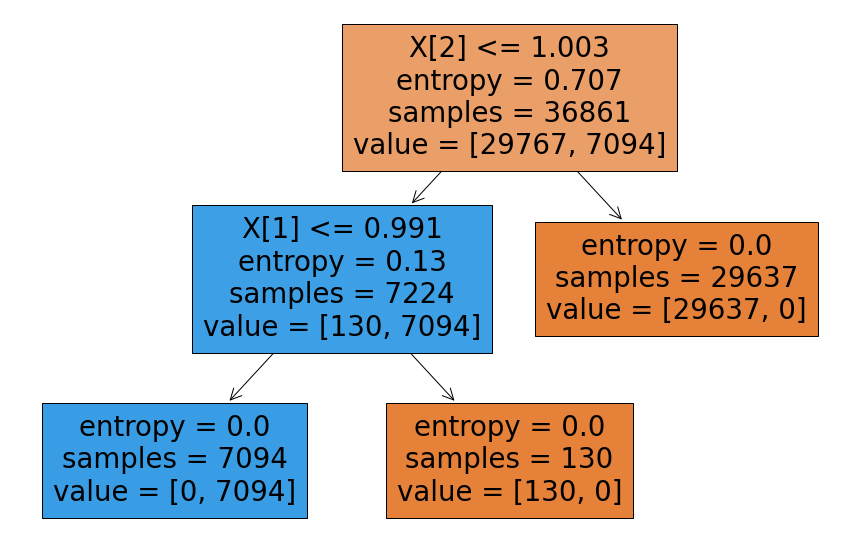

In [30]:
from sklearn import tree
from matplotlib.pyplot import figure

figure(figsize=(15,10))
tree.plot_tree(iris_dtree, filled=True, impurity=True)


In [32]:
custom_features = [
    # Petal Width , Petal Length
    [10,0.948621,2.311150,0.301874,4.624211,0.777361],
    [10,0.948621,2.311150,0.301874,4.624211,0.777361]
]

custom_df = pd.DataFrame(custom_features)

display(custom_df)

iris_dtree.predict(custom_df)

,0,1,2,3,4,5
0,10,0.948621,2.31115,0.301874,4.624211,0.777361
1,10,0.948621,2.31115,0.301874,4.624211,0.777361


array([2, 2], dtype=int64)

In [36]:
np_array=iris_dtree.predict(custom_df)

df = pd.DataFrame(np_array, columns=['Column1'])

In [37]:
df

,Column1
0,2
1,2


In [38]:
df.join(custom_df)

,Column1,0,1,2,3,4,5
0,2,10,0.948621,2.31115,0.301874,4.624211,0.777361
1,2,10,0.948621,2.31115,0.301874,4.624211,0.777361


[0.         0.03606678 0.96393322 0.         0.         0.        ]


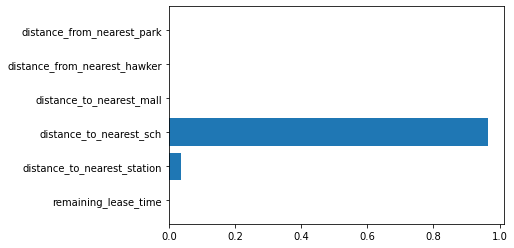

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(features, iris_dtree.feature_importances_)
print(iris_dtree.feature_importances_)  

In [36]:
full_results = iris_dtree.predict(x_test)
print("Full tree predictions:")
print(full_results)

Full tree predictions:
[3 2 2 ... 3 2 2]


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_f = confusion_matrix(y_test, full_results) #(actual,prediction)


print(cm_f) 


[[7449    0]
 [   0 1767]]


Confusion matrix (Full tree)
[[7449    0]
 [   0 1767]]


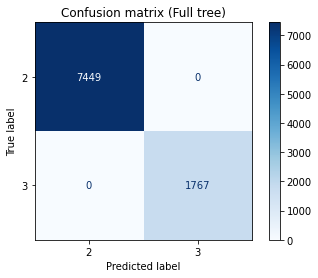

In [38]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix (Full tree)", iris_dtree)]

for title, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,full_results))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00      7449
           3       1.00      1.00      1.00      1767

    accuracy                           1.00      9216
   macro avg       1.00      1.00      1.00      9216
weighted avg       1.00      1.00      1.00      9216



In [40]:
print("Full tree accuracy", iris_dtree.score(x_test, y_test))

Full tree accuracy 1.0
